# Proyecto de curso: Clasificador de medusas

## Entendimineto del negocio

## Entendimiento de los datos
El siguiente conjunto de datos fue extraido del repositorio https://www.kaggle.com/datasets/anshtanwar/jellyfish-types/data, el cual cuenta con 900 imagenes sobre distintas especies de medusas. El objetivo del proyecto es aplicar las tecnicas de Machine Learning durante el curso y poder crear un clasificador de medusas a partir de las imagenes brindadas.

Las imagenes ya se encuentran organizadas en carpetas con el respectivo nombre de la clase a la cual pertenecen ademas que el conjunto de datos ya se encuentra dividido en los conjuntos de entrenamiento, prueba y validación, por tanto, no es necesario realizar una division del conjunto de datos. Para el conjunto de datos de entrenamiento cada clase cuenta con 150 imagenes, para el conjunto de entrenamiento varian entre 5 y 7 imagenes por clase y para el de prueba varia entre 5 y 8 imagenes por clase

La clases a la las que pertenecen las medusas dek conjunto de datos son las siguientes:
1. Barrel jellyfish (Rhizostoma pulmo): La medusa más grande que se encuentra en aguas británicas, con una campana que puede crecer hasta 90 cm de diámetro. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
2. Blue jellyfish (Cyanea lamarckii): Medusas de gran tamaño que pueden crecer hasta 30 cm de diámetro. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
3. Compass jellyfish (Chrysaora hysoscella): El nombre se debe a las marcas marrones en su campana que se asemejan a una rosa de los vientos. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
4. Lion’s mane jellyfish (Cyanea capillata): La medusa más grande del mundo, con una campana que puede crecer hasta 2 metros de diámetro y tentáculos que pueden alcanzar hasta 30 metros de largo. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
5. Mauve stinger (Pelagia noctiluca): Pequeña medusa con largos tentáculos y estructuras verrugosas en su campana repletas de células urticantes. Se alimenta de otras pequeñas medusas y ascidias oceánicas.
6. Moon jellyfish (Aurelia aurita): Medusa común con cuatro gónadas en forma de herradura visibles a través de la parte superior de su campana translúcida. Se alimenta recolectando medusas, plancton y moluscos con sus tentáculos.

Los datos se encuentran completos y balanceados.

In [1]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
class_name = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']
class_names_label = {class_name: i for i, class_name in enumerate(class_name)}
count_class = len(class_name)
IMAGE_SIZE = (240, 240)

In [18]:
def load_data(class_name):
    
    # Directorio donde se encuentran almacenado los datasets
    data = None
    
    images = []
    labels = []
        
    for folder in class_name:

        print(f'Cargando "{folder}"')
        label = class_names_label[folder]
        
        for file in tqdm(os.listdir(folder)):
            
            img_path = os.path.join(folder, file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)
            temp = image

            images.append(image)
            labels.append(label)
    images = np.array(images, dtype = 'uint8')
    labels = np.array(labels, dtype = 'int32')

    data =(images, labels)
    
    return data

In [19]:
def display_random_image(class_names, X, y):
    index = np.random.randint(X.shape[0])
    plt.figure()
    plt.imshow(X[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : '+class_names[y[index]])
    plt.show()

In [20]:
X, y= load_data(class_name)

Cargando "barrel_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1212.64it/s]


Cargando "blue_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1156.69it/s]


Cargando "compass_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1222.78it/s]


Cargando "lions_mane_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1212.61it/s]


Cargando "mauve_stinger_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1242.70it/s]


Cargando "Moon_jellyfish"


100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 1318.99it/s]


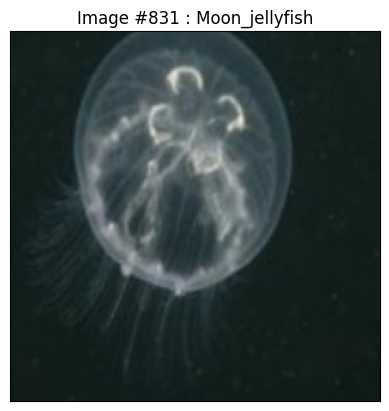

In [21]:
display_random_image(class_name, X, y)

Text(0, 0.5, 'Cantidad')

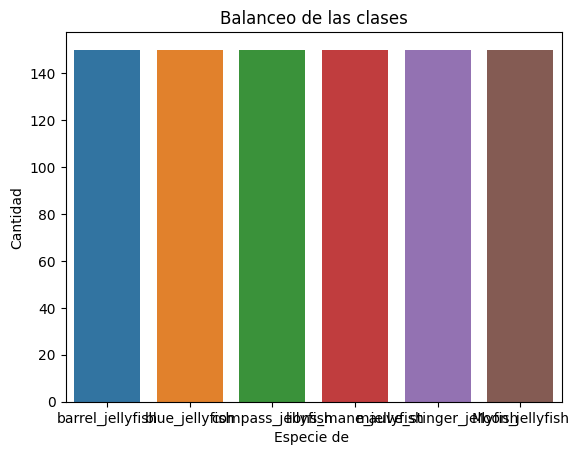

In [38]:
plt.figure()
sns.countplot(x = y, hue=y)
plt.title('Balanceo de las clases')
plt.xlabel('Especie de ')
plt.ylabel('Cantidad')
